# Overview

This dataset is from Kaggle competition: https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection

This dataset contains the information about mobile fradulent events in China.

The goal is to use the information given to predict whether a phone call is fradulent or not.

# Load data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
# warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
talking = pd.read_csv('train_sample.csv', parse_dates = ['click_time'])

# Data overview

We take a look at the size of the data, the type of each columns of the data.

Also we checked the head and tail of the data to check there is no anormality in the data.

Finally, we took a sample from the data and realize that this is potentially imbalanced dataset.

So we did further exploration in the next section and dealt with it.

Predictors: 

• ip: ip address of click

• app: app id for marketing

• device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)

• os: os version id of user mobile phone

• channel: channel id of mobile ad publisher

• click_time: timestamp of click (UTC)

• attributed_time: if user download the app for after clicking an ad, this is the time of the app download

Target:

• is_attributed: the target that is to be predicted, indicating the app was downloaded

In [5]:
len(talking)

100000

In [6]:
talking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null datetime64[ns]
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 6.1+ MB


In [7]:
talking.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [8]:
talking.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0
99999,119349,14,1,15,401,2017-11-07 14:32:27,NaN,0


In [9]:
talking.sample(5) ## imbalanced data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
5130,174887,9,1,18,215,2017-11-08 02:53:12,NaN,0
18550,154166,14,1,25,463,2017-11-07 08:24:54,NaN,0
56386,138821,9,1,15,445,2017-11-07 14:07:56,NaN,0
64060,97744,1,1,13,125,2017-11-07 17:01:18,NaN,0
86716,4107,15,1,6,153,2017-11-08 11:11:36,NaN,0


# Explore the data

## Imbalanced dataset

The data apparently imbalanced, the fradualent data is ony less than 0.3% of the total data.

Therefore, we plan to down sample the normal data and make fradulent the same size of the non-fradulent data

In [10]:
num_attributed_time = talking['is_attributed'].value_counts()

In [11]:
num_attributed_time

0    99773
1      227
Name: is_attributed, dtype: int64

In [12]:
# extremely imbalanced data, we may need to resample the data in the training stage
print('is_attributed==0 weight: %.4f%%' % (num_attributed_time[0]/sum(num_attributed_time)*100))
print('is_attributed==1 weight: %.4f%%' % (num_attributed_time[1]/sum(num_attributed_time)*100))

is_attributed==0 weight: 99.7730%
is_attributed==1 weight: 0.2270%


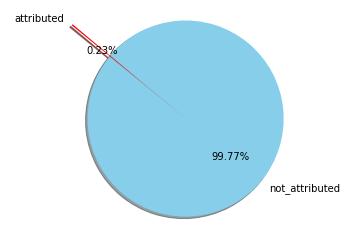

In [13]:
# visualize the imbalance: extremely imbalanced
labels = 'attributed', 'not_attributed'
sizes = [num_attributed_time[1], num_attributed_time[0]]
colors = ['red', 'skyblue']
explode = (0.5, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

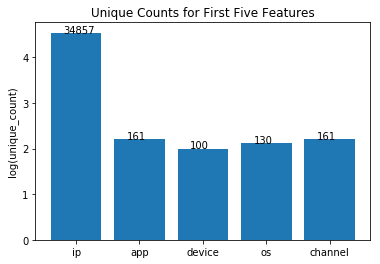

In [27]:
heads = talking.columns
# print(heads)
# for i in list(range(0,5)) + list(range(-1, -6, -1)):
#     talking[heads[i]] = talking[heads[i]].astype('category')
# talking.info()
# visualize number of unique values for each categorical feature
x = np.arange(1, 6)
unique = [len(talking[i].unique()) for i in heads[:5]]
y = np.array([math.log(i, 10) for i in unique])
plt.bar(x, y)
for i, v in enumerate(unique):
    plt.text(i + .8, math.log(v, 10), str(v))

plt.ylabel('log(unique_count)')
plt.xticks(np.arange(1,6), ('ip', 'app', 'device', 'os', 'channel'))
plt.title('Unique Counts for First Five Features')
plt.show()

In [28]:
print('number of distinct values in \'ip\' is: %s.' % len(talking['ip'].unique()))
print('number of distinct values in \'app\' is: %s.' % len(talking['app'].unique()))
print('number of distinct values in \'device\' is: %s.' % len(talking['device'].unique()))
print('number of distinct values in \'channel\' is: %s.' % len(talking['channel'].unique()))
print('number of distinct values in \'click_time\' is: %s.' % len(talking['click_time'].unique()))
print('number of distinct values in \'attribute_time\' is: %s.' % len(talking['attributed_time'].unique()))
print('but everything is encoded so we don\'t know anything else except what time represents.')
print('however, app and channel interestingly have the same number of unique values, could this reveal something?')

number of distinct values in 'ip' is: 34857.
number of distinct values in 'app' is: 161.
number of distinct values in 'device' is: 100.
number of distinct values in 'channel' is: 161.
number of distinct values in 'click_time' is: 80350.
number of distinct values in 'attribute_time' is: 228.
but everything is encoded so we don't know anything else except what time represents.
however, app and channel interestingly have the same number of unique values, could this reveal something?


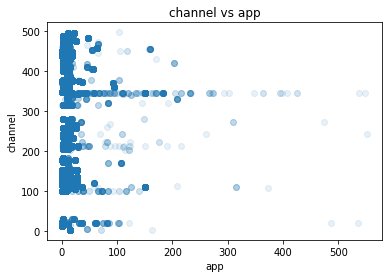

this shows that channel and app are not significantly correlated


In [29]:
plt.scatter(talking['app'], talking['channel'], alpha=0.1)
plt.xlabel('app')
plt.ylabel('channel')
plt.title('channel vs app')
plt.show()
print('this shows that channel and app are not significantly correlated')

In [30]:
print('the first click time is on: %s.' % min(talking['click_time']))
print('the last click time is on: %s.' % max(talking['click_time']))

the first click time is on: 2017-11-06 16:00:00.
the last click time is on: 2017-11-09 15:59:51.


In [31]:
talking.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
day                    0
hour                   0
minute                 0
second                 0
dtype: int64

In [32]:
print('this makes sense because only those marked as 1 have downloaded the app')

this makes sense because only those marked as 1 have downloaded the app


In [33]:
cleanedList = [x for x in talking['attributed_time'] if str(x) != 'nan']
print('the first attribute time is on: %s.' % min(cleanedList))
print('the last attribute time is on: %s.' % max(cleanedList))
print('but we don\'t need this column as attributed time is highly correlated with whether user download the app')

the first attribute time is on: 2017-11-06 17:19:04.
the last attribute time is on: 2017-11-09 15:28:15.
but we don't need this column as attributed time is highly correlated with whether user download the app


## Preprocess raw features

The attributed_time feature is redundant because as long as the user download the data, there will be attributed_time feature, therefore we drop this feature.

Furthermore, the click_time feature is in timestamp format, we extract day, hour, minute second from the time stamp, and make them into 4 new columns.

The rest are categorical data, but they are encoded by kaggle to protect confidential information


In [34]:
# transform click_time into day, hour, minute and second
talking['day'] = talking['click_time'].dt.day
talking['hour'] = talking['click_time'].dt.hour
talking['minute'] = talking['click_time'].dt.minute
talking['second'] = talking['click_time'].dt.second
talking.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,7,9,30,38
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,7,13,40,27
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,7,18,5,24
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,7,4,58,8
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,9,9,0,9


In [35]:
# ip, app, device, os, channel, is_attributed and the time features we just created
# are encoded to be integers, we tranform them into categorical data
heads = talking.columns
print(heads)
for i in list(range(0,5)) + list(range(-1, -6, -1)):
    talking[heads[i]] = talking[heads[i]].astype('category')
talking.info()

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'day', 'hour', 'minute', 'second'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
ip                 100000 non-null category
app                100000 non-null category
device             100000 non-null category
os                 100000 non-null category
channel            100000 non-null category
click_time         100000 non-null category
attributed_time    227 non-null category
is_attributed      100000 non-null category
day                100000 non-null category
hour               100000 non-null category
minute             100000 non-null category
second             100000 non-null category
dtypes: category(12)
memory usage: 6.8 MB


In [47]:
new1 = talking[talking['is_attributed']==1]
new0 = talking[talking['is_attributed']==0]
def down_sample(new1, new0, rand):
    """
    This function takes in two imbalanced data frames
    and returns a concatenated data frame
    """
    if len(new1) > len(new0):
        new_tmp = new1
        new1 = new0
        new0 = new_tmp
    frac = len(new1)/len(new0)
    new0sample = new0.sample(frac=frac, random_state=rand)
    newdata = pd.concat([new0sample,new1])
    feature_index = 'is_attributed' # {0, 1, 2, 3}
    X = newdata.loc[:, newdata.columns != 'is_attributed']
    X = X.loc[:, X.columns != 'click_time']
    X = X.loc[:, X.columns != 'attributed_time']
    X = X.loc[:, X.columns != 'second']
    X = X.loc[:, X.columns != 'minute']
    y = newdata['is_attributed']
    return X, y

In [102]:
new1 = talking[talking['is_attributed']==1]
new0 = talking[talking['is_attributed']==0]
frac = len(new1)/len(new0)
new0sample = new0.sample(frac=frac)
newdata = pd.concat([new0sample,new1])
feature_index = 'is_attributed' # {0, 1, 2, 3}
X = newdata.loc[:, newdata.columns != 'is_attributed']
X = X.loc[:, X.columns != 'click_time']
X = X.loc[:, X.columns != 'attributed_time']
X = X.loc[:, X.columns != 'second']
X = X.loc[:, X.columns != 'minute']
y = newdata['is_attributed']

## Train Model

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn import datasets, neighbors, linear_model

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
pip_knn = Pipeline([('clf', KNeighborsClassifier())])
pip_rfc = Pipeline([('clf', RandomForestClassifier(n_estimators=100))])
pip_lr = Pipeline([('clf', LogisticRegression(solver='lbfgs'))])
pip_gnb = Pipeline([('clf', GaussianNB())])
pip_gbc = Pipeline([('clf', GradientBoostingClassifier())])
pip_mlp = Pipeline([('clf', MLPClassifier())])
pip_svc1 = Pipeline([('clf', LinearSVC())])
pip_svc2 = Pipeline([('clf', SVC())])

pipelines = [pip_knn, pip_rfc, pip_lr, pip_gnb, pip_gbc, pip_mlp, pip_svc1, pip_svc2]

In [106]:
d={}
for pipe in pipelines:
    name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]
    score = pipe.fit(X_train, y_train).score(X_test, y_test)
    d[name] = score
newd = sorted(d.items(), key=lambda x: (-x[1]))

/Users/ziyuanhan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [107]:
# newd = sorted(d.items(), key=lambda x: (-x[1]))

# print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
# print('lr2 score: %f' % lr.fit(X_train, y_train).score(X_test, y_test))
# print('gnb score: %f' % gnb.fit(X_train, y_train).score(X_test, y_test))
# print('svc1 score: %f' % svc1.fit(X_train, y_train).score(X_test, y_test))
# print('svc2 score: %f' % svc2.fit(X_train, y_train).score(X_test, y_test))
# print('rfc score: %f' % rfc.fit(X_train, y_train).score(X_test, y_test))
# print('mlp score: %f' % mlp.fit(X_train, y_train).score(X_test, y_test))
# print('gbc score: %f' % gbc.fit(X_train, y_train).score(X_test, y_test))
tmp_df = pd.DataFrame(columns=['type','mean_accu'])
for key,value in newd:
    tmp_df = tmp_df.append({'type':key, 'mean_accu':value},ignore_index=True)
tmp_df

,type,mean_accu
0,GradientBoostingClassifier,0.934307
1,RandomForestClassifier,0.912409
2,LogisticRegression,0.766423
3,KNeighborsClassifier,0.656934
4,GaussianNB,0.576642
5,LinearSVC,0.554745
6,MLPClassifier,0.518248
7,SVC,0.481752


In [108]:
print('We have seen that in certain case there is good and bad, what about we iterate over 100 downsample data?')

We have seen that in certain case there is good and bad, what about we iterate over 100 downsample data?


In [109]:
# test code
plot_df = pd.DataFrame(columns=['type','mean_accu','f1_score'])
plot_df = pd.DataFrame(columns=['type','mean_accu'])
# dftmp = pd.DataFrame(['knn',0.1,0.2], columns=['type','mean_accu','f1_score'])
plot_df = plot_df.append({'type':'knn','mean_accu':0.1},ignore_index=True)
plot_df.append({'type':'rnn'},ignore_index=True)
plot_df

,type,mean_accu
0,knn,0.1


In [115]:
warnings.filterwarnings('ignore')
plot_df = pd.DataFrame(columns=['type','mean_accu','f1_score'])
for i in range(0,100):
    X,y = down_sample(new1, new0, i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for pipe in pipelines:
        pipe.fit(X_train, y_train)
        name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]
        a = balanced_accuracy_score(pipe.predict(X_test), y_test)
        b = f1_score(pipe.predict(X_test),y_test)
        plot_df = plot_df.append({'type':name,'mean_accu':a, 'f1_score':b}, ignore_index=True)
    
#     knn = neighbors.KNeighborsClassifier().fit(X_train, y_train)
#     a = balanced_accuracy_score(knn.predict(X_test), y_test)
#     b = f1_score(knn.predict(X_test),y_test)
#     plot_df = plot_df.append({'type':'knn','mean_accu':a, 'f1_score':b},ignore_index=True)
    
#     rfc = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
#     a = balanced_accuracy_score(rfc.predict(X_test), y_test)
#     b = f1_score(rfc.predict(X_test),y_test)
#     plot_df = plot_df.append({'type':'rfc','mean_accu':a, 'f1_score':b},ignore_index=True)
    
#     lr = LogisticRegression(solver='lbfgs').fit(X_train, y_train)   
#     a = balanced_accuracy_score(lr.predict(X_test), y_test))
#     b = f1_score(lr.predict(X_test),y_test)
#     plot_df = plot_df.append({'type':'lr','mean_accu':a, 'f1_score':b},ignore_index=True)


In [116]:
print('so the best classifers are so far GBC and RFC')

so the best classifers are so far GBC and RFC


In [117]:
# import seaborn as sns; sns.set()
# import matplotlib.pyplot as plt
# tips = sns.load_dataset("tips")
plot_df.head()

,type,mean_accu,f1_score
0,KNeighborsClassifier,0.707640,0.696970
1,RandomForestClassifier,0.876066,0.874074
2,LogisticRegression,0.777303,0.780822
3,GaussianNB,0.766304,0.761194
4,GradientBoostingClassifier,0.883795,0.882353


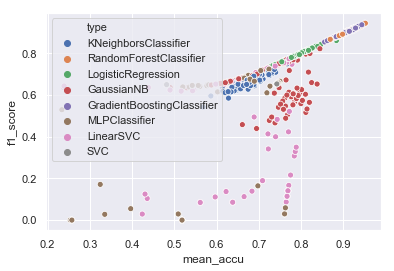

In [118]:
ax = sns.scatterplot(x="mean_accu", y="f1_score", hue="type", data=plot_df)

In [ ]:
print('So the best two are random forest and gradient booosting, we would further use these two to improve the result using grid search')

In [ ]:
def grid_search_rfc(X_train, X_test, y_train, y_test):
    pipe_grid = Pipeline([('pca', PCA()),
                          ('clf', KNeighborsClassifier())])
    
    grid_params = dict(pca__n_components=range(1,8),
                       clf__n_neighbors=range(1,20))

    gs = GridSearchCV(estimator=pipe_grid,  
                      param_grid=grid_params,
                      scoring='accuracy',
                      cv=10)

    gs.fit(X_train, y_train)
    accuracy = gs.score(X_test, y_test)
    best_params = gs.best_params_
    
    return accuracy, best_params

In [ ]:
grid_search_knn(X_train, X_test, y_train, y_test)

In [ ]:
def grid_search_gbc(X_train, X_test, y_train, y_test):
    """
    1. Create a pipeline with PCA into k-NN.
    2. Define a grid search for n_components of PCA and n_neighbors of k-NN
    3. Conduct grid search
    4. Return score (accuracy) and dictionary of best parameters
    """
    pipe_grid = Pipeline([('pca', PCA()),
                          ('clf', LogisticRegression(solver='lbfgs'))])
    
    grid_params = dict(pca__n_components=range(1,8),
                       clf__penalty=['l1'],
                       clf__solver=['liblinear', 'saga'])
                    

    gs = GridSearchCV(estimator=pipe_grid,  
                      param_grid=grid_params,
                      scoring='accuracy',
                      cv=10)

    gs.fit(X_train, y_train)
    accuracy = gs.score(X_test, y_test)
    best_params = gs.best_params_
    
    return accuracy, best_params

In [ ]:
grid_search_lrl1(X_train, X_test, y_train, y_test)

In [ ]:
X.head()

## Revised Feature Engineering using insights from Kaggle